# Requisitos

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD

# Cargada de datos

In [22]:
X_raw = np.load('X.npy')
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)

/home/curz/documents/projects/proc_ta3/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/curz/documents/projects/proc_ta3/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/curz/documents/projects/proc_ta3/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12454 (\N{KATAKANA LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/curz/documents/projects/proc_ta3/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/curz/documents/projects/proc_ta3/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarn

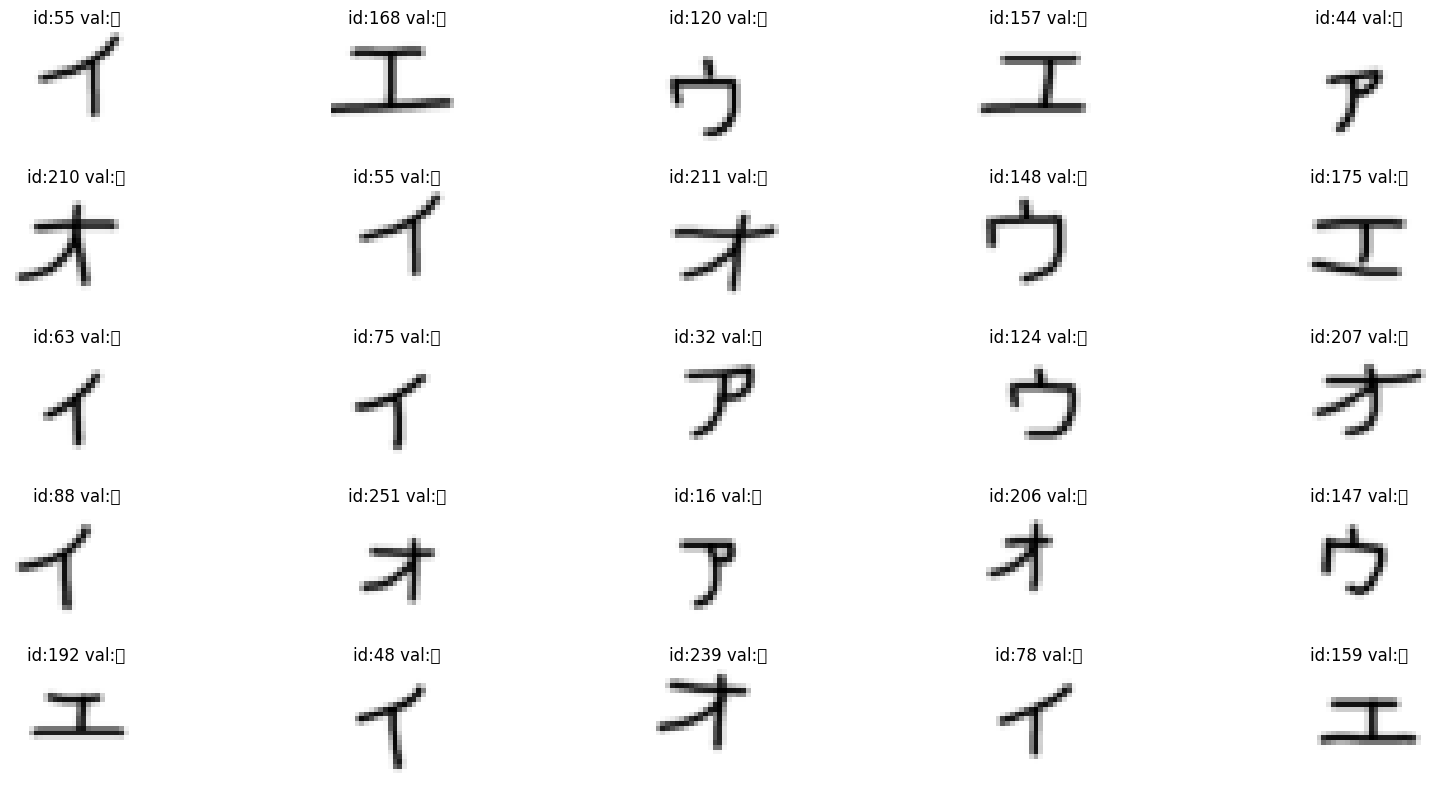

In [23]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

# Entrenamiento del modelo

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(205, 28, 28, 1) (52, 28, 28, 1)


In [25]:
bs = 16
lr = 0.0001
class_mapping = {'ア': 0, 'イ': 1, 'ウ': 2, 'エ':3, 'オ':4}
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(*size,1)),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'), #modificar!
                    Dense(5, activation='softmax')]) #no modificar

In [26]:
optimizer1 = SGD(learning_rate=lr)
model.compile(optimizer= optimizer1, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)        

In [27]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=2000, validation_data=(X_test, y_test))
model.save('modelo_entrenado.h5')

Epoch 1/2000
13/13 [==============================] - 0s 14ms/step - loss: 1.6091 - accuracy: 0.1707 - val_loss: 1.6104 - val_accuracy: 0.1731
Epoch 2/2000
13/13 [==============================] - 0s 7ms/step - loss: 1.6090 - accuracy: 0.1756 - val_loss: 1.6103 - val_accuracy: 0.1731
Epoch 3/2000
13/13 [==============================] - 0s 7ms/step - loss: 1.6088 - accuracy: 0.1756 - val_loss: 1.6102 - val_accuracy: 0.1923
Epoch 4/2000
13/13 [==============================] - 0s 7ms/step - loss: 1.6087 - accuracy: 0.1756 - val_loss: 1.6101 - val_accuracy: 0.1923
Epoch 5/2000
13/13 [==============================] - 0s 7ms/step - loss: 1.6086 - accuracy: 0.1756 - val_loss: 1.6100 - val_accuracy: 0.1923
Epoch 6/2000
13/13 [==============================] - 0s 7ms/step - loss: 1.6085 - accuracy: 0.1756 - val_loss: 1.6099 - val_accuracy: 0.1923
Epoch 7/2000
13/13 [==============================] - 0s 7ms/step - loss: 1.6083 - accuracy: 0.1756 - val_loss: 1.6098 - val_accuracy: 0.1923
Epoch

/home/curz/documents/projects/proc_ta3/env/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Probando el modelo

In [28]:
#Probando modelo
etiqueta_a_fruta = {'ア': 0, 'イ': 1, 'ウ': 2, 'エ':3, 'オ':4}

In [29]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
nombre_fruta = etiqueta_a_fruta.get(label, 'Desconocida')

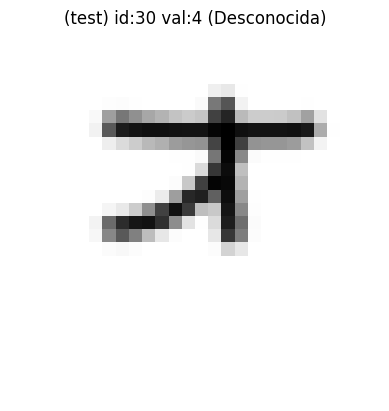

In [30]:
plt.title('(test) id:{} val:{} ({})'.format(idx, label, nombre_fruta))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()


In [31]:
#Usando el modelo
salida = model.predict(im[None,:,:,:])[0]

1/1 [==============================] - 0s 68ms/step


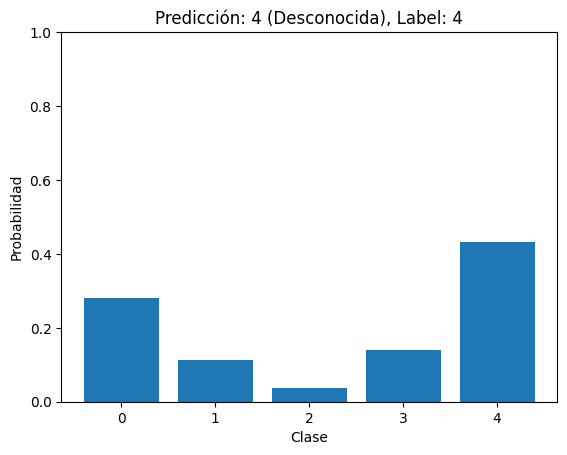

In [32]:
plt.figure()
plt.title("Predicción: {} ({}), Label: {}".format(salida.argmax(), nombre_fruta, label))
plt.ylabel("Probabilidad")
plt.xlabel("Clase")
plt.ylim([0, 1])
plt.bar(np.arange(len(salida)), salida)
plt.show()